In [230]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [231]:
data=pd.read_csv('train.csv')
#print(data.head().T)

In [232]:
test_data=pd.read_csv('test.csv')
#print(data.head().T)

# EDA

In [233]:
#get columnms name
columns_name=data.columns.values
#print(columns_name)
#print(data.info())

In [234]:
missing_data=pd.DataFrame({'missing':data.isnull().sum()})
#print(missing_data)
statistical_description=data.describe()
print(statistical_description)
data_shape=data.shape
#print("The shape of data {}".format(data_shape))

            TempOut        HiTemp       LowTemp        OutHum         DewPt  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean      58.508625     58.975230     58.056785     72.915750     48.156873   
std       12.119640     12.323427     11.916335     20.873482      7.895771   
min       29.300000     29.500000     29.300000      4.000000      1.200000   
25%       51.100000     51.300000     50.800000     58.000000     43.600000   
50%       56.400000     56.800000     56.100000     79.000000     49.700000   
75%       65.300000     66.000000     64.700000     91.000000     53.900000   
max      110.300000    111.000000    108.600000     98.000000     66.900000   

          WindSpeed       WindRun       HiSpeed     WindChill     HeatIndex  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       2.348650      0.587163      6.028675     58.373335     58.139203   
std        2.346365      0.586591      4.808251    

# DECISIONS

(40000, 4)


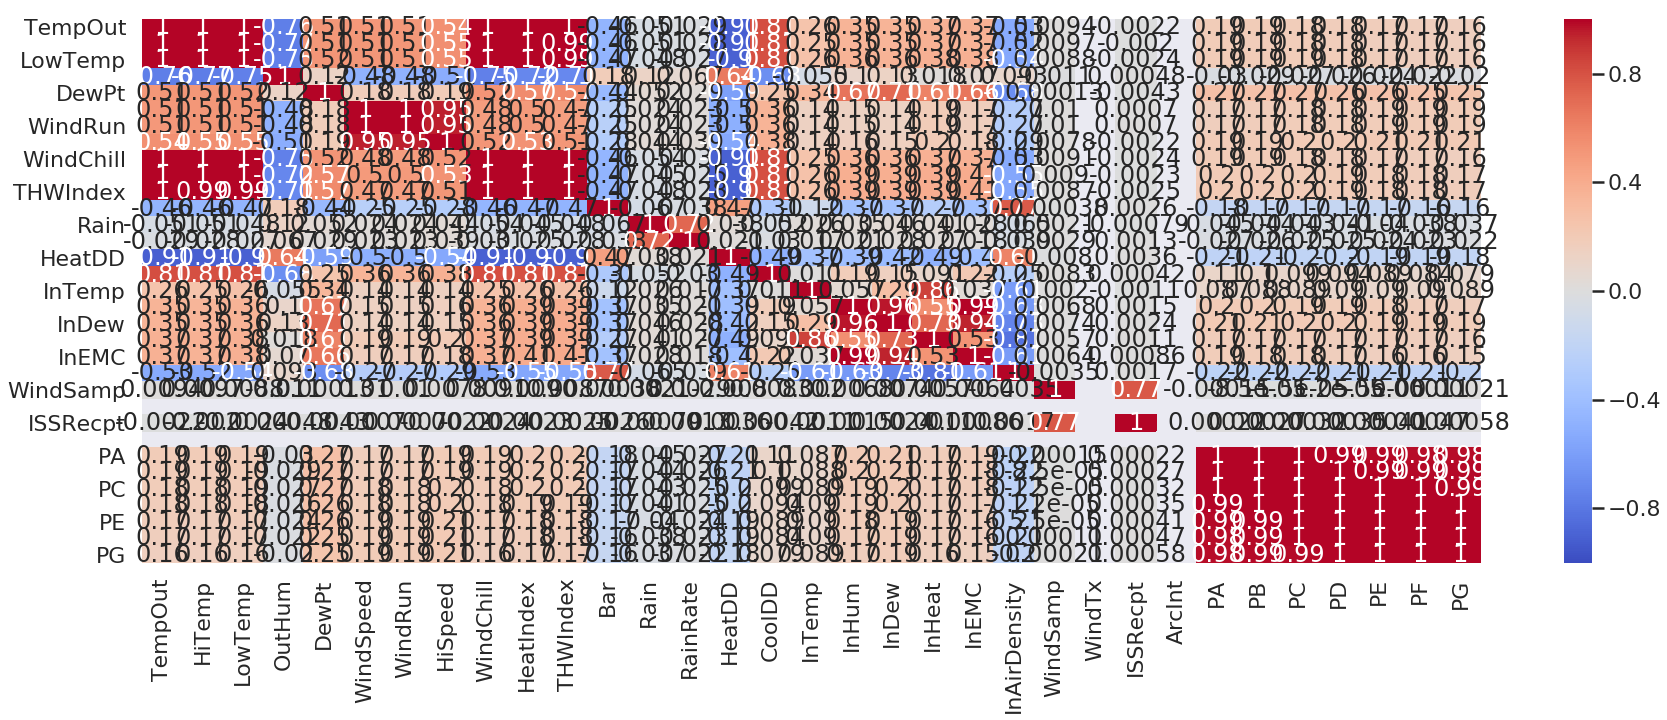

In [235]:
#Knowing the sub-oka format...
sub_oka=pd.read_csv('sample.csv')
#print(sub_oka.head())

#selecting the categorical values columns
categorical=data.select_dtypes(include=['object'])
print(categorical.shape)
#print(categorical)

"""
#finding correlation matrix...
correlation_of_data=data.corr()
plt.figure(figsize=(30,15))
sns.heatmap(correlation_of_data,annot=True)
"""
plt.figure(figsize=(30,10))
sns.heatmap(data.corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True)

In [236]:
data=data.drop(['DateTime','WindSamp', 'WindTx' ,'ISSRecpt', 'ArcInt'],axis=1)
test_data=test_data.drop(['DateTime','WindSamp', 'WindTx' ,'ISSRecpt', 'ArcInt'],axis=1)
#firstly printed dataset columns
print(data.columns.values)

['ID' 'TempOut' 'HiTemp' 'LowTemp' 'OutHum' 'DewPt' 'WindSpeed' 'WindDir'
 'WindRun' 'HiSpeed' 'HiDir' 'WindChill' 'HeatIndex' 'THWIndex' 'Bar'
 'Rain' 'RainRate' 'HeatDD' 'CoolDD' 'InTemp' 'InHum' 'InDew' 'InHeat'
 'InEMC' 'InAirDensity' 'PA' 'PB' 'PC' 'PD' 'PE' 'PF' 'PG']


In [237]:
#Label encoding the categorical values.......
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['WindDir']=label_encoder.fit_transform(data['WindDir'])
data['HiDir']=label_encoder.fit_transform(data['HiDir'])


test_data['WindDir']=label_encoder.fit_transform(test_data['WindDir'])
test_data['HiDir']=label_encoder.fit_transform(test_data['HiDir'])
categorical=data.select_dtypes(include=['object'])
print(categorical.shape)
#print(categorical)

(40000, 1)


In [238]:
#plotting all columns of dataset using "PA"
"""
columns=list(data.columns.values)
#print(columns)

target_list=['PA', 'PB', 'PC', 'PD', 'PE', 'PF', 'PG']


for i in range(1,len(columns)):
     data.plot.scatter(x=columns[i],y=target_list[0])


"""
   
    


"\ncolumns=list(data.columns.values)\n#print(columns)\n\ntarget_list=['PA', 'PB', 'PC', 'PD', 'PE', 'PF', 'PG']\n\n\nfor i in range(1,len(columns)):\n     data.plot.scatter(x=columns[i],y=target_list[0])\n\n\n"

In [239]:
pa=data['PA']
pb=data['PB']
pc=data['PC']
pd=data['PD']
pe=data['PE']
pf=data['PF']
pg=data['PG']

training_data=data
training_data=training_data.drop(['ID','PA','PB', 'PC', 'PD', 'PE', 'PF', 'PG'],axis=1)
print(training_data.columns.values)

['TempOut' 'HiTemp' 'LowTemp' 'OutHum' 'DewPt' 'WindSpeed' 'WindDir'
 'WindRun' 'HiSpeed' 'HiDir' 'WindChill' 'HeatIndex' 'THWIndex' 'Bar'
 'Rain' 'RainRate' 'HeatDD' 'CoolDD' 'InTemp' 'InHum' 'InDew' 'InHeat'
 'InEMC' 'InAirDensity']


In [240]:
#predicting PA for the dataset
from sklearn.linear_model import LinearRegression
pa_regression_model = LinearRegression()
pa_regression_model.fit(training_data, pa)

pb_regression_model = LinearRegression()
pb_regression_model.fit(training_data, pb)


pc_regression_model = LinearRegression()
pc_regression_model.fit(training_data, pc)

pd_regression_model = LinearRegression()
pd_regression_model.fit(training_data, pd)

pe_regression_model = LinearRegression()
pe_regression_model.fit(training_data, pe)

pf_regression_model = LinearRegression()
pf_regression_model.fit(training_data, pf)

pg_regression_model = LinearRegression()
pg_regression_model.fit(training_data, pg)




LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [241]:
test_data_id=test_data['ID'].tolist()
test_data=test_data.drop(['ID'],axis=1)
#test_data is ok now for predicting
#test_data.head().T

In [253]:
predict_pa=pa_regression_model.predict(test_data).tolist()
predict_pb=pb_regression_model.predict(test_data).tolist()
predict_pc=pc_regression_model.predict(test_data).tolist()
predict_pd=pd_regression_model.predict(test_data).tolist()
predict_pe=pe_regression_model.predict(test_data).tolist()
predict_pf=pf_regression_model.predict(test_data).tolist()
predict_pg=pg_regression_model.predict(test_data).tolist()


predict_pa = [round(x) for x in predict_pa]
predict_pb = [round(x) for x in predict_pb]

predict_pc = [round(x) for x in predict_pc]

predict_pd = [round(x) for x in predict_pd]

predict_pe = [round(x) for x in predict_pe]

predict_pf = [round(x) for x in predict_pf]

predict_pg = [round(x) for x in predict_pg]



In [255]:
import pandas as pd
subm=pd.DataFrame({'ID':test_data_id,'PA':predict_pa,'PB':predict_pb,'PC':predict_pc,'PD':predict_pd,'PE':predict_pe,'PF':predict_pf,'PG':predict_pg})


subm['PA']=subm['PA'].abs()
subm['PB']=subm['PB'].abs()
subm['PC']=subm['PC'].abs()
subm['PD']=subm['PD'].abs()
subm['PE']=subm['PE'].abs()
subm['PF']=subm['PF'].abs()
subm['PG']=subm['PG'].abs()


subm.to_csv('output.csv',index=False)


In [256]:
ans=pd.read_csv('output.csv')
ans.head()

,ID,PA,PB,PC,PD,PE,PF,PG
0,PR40001,589,304,176,111,75,54,40
1,PR40002,665,344,199,126,85,61,45
2,PR40003,630,324,187,118,80,57,42
3,PR40004,703,362,209,131,89,63,47
4,PR40005,828,421,240,149,100,70,52


In [257]:
ans.isnull().sum()

ID    0
PA    0
PB    0
PC    0
PD    0
PE    0
PF    0
PG    0
dtype: int64